In [1]:
#Supressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)


### Step 1-Reading and understanding the data

In [2]:
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the shape of the dataset
leads.shape

(9240, 37)

We have 9240 data points and 37 features

In [4]:
#Checking the datatypes of all the variables
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking the numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2-Data Cleaning and Preparation

In [6]:
#Dropping duplicate rows
leads.drop_duplicates(inplace=True)

In [7]:
# Dropping columns generated by the sales team

sales_col=['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Activity','Last Notable Activity','Lead Profile']
leads.drop(sales_col,axis=1,inplace=True)

These are the columns which were created by the sales team after contacting the customers.As our model will be assisting the sales team before they contact any potential leads hence these columns cant be used by our model.

In [8]:
# Checking null value percentages for all columns
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [9]:
for col in leads.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(leads[col].value_counts(normalize= True)*100)
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Live Chat             0.021730
Social Media          0.021730
Pay per Click Ads     0.01086

In [10]:
# Many columns have Select as one of the levels this is an error as the customer must have left that option as it is
# Hence Replacing it with null values
leads['How did you hear about X Education']=leads['How did you hear about X Education'].replace('Select',np.nan)
leads['City']=leads['City'].replace('Select',np.nan)
leads['Specialization']=leads['Specialization'].replace('Select',np.nan)

In [11]:
#Checking null values again
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [12]:
#Dropping the columns where null value percent is greater than 40 percent
for k in leads.columns:
    if leads[k].isnull().sum()/len(leads)>.4:
        leads.drop(k,1,inplace=True)

### Columns with very low to nill variance in data

In [13]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [14]:
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [15]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [16]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [17]:
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [18]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [19]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [20]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [21]:
leads['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [22]:
leads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [23]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [24]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Belgium                    2
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Ghana                      2
Italy                      2
China                      2
Switzerland                1
Liberia                    1
Tanzania                   1
Russia                     1
Indonesia                  1
Kenya                      1
Denmark       

In [26]:
# Dropping columns with very low to nill varince in data

to_drop=['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Country'
        ,'Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course']


In [27]:
leads.drop(to_drop,1,inplace=True)

In [28]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Specialization                            36.580087
What is your current occupation           29.112554
City                                      39.707792
A free copy of Mastering The Interview     0.000000
dtype: float64

### Aggregating column levels with low values in one category

In [29]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
blog                    1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [30]:
leads['Lead Source'].replace(['Press_Release','Live Chat','WeLearn','testone','Reference','Welingak Website','Referral Sites','Facebook','bing','Click2call','Social Media','Live','Chat Press_Release','blog','testone WeLearn','welearnblog_Home','NC_EDM','Pay per Click Ads','youtubechannel'],'Others',inplace=True)
leads['Lead Source']=leads['Lead Source'].replace('google','Google')

In [31]:
leads['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             879
Name: Lead Source, dtype: int64

In [32]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [33]:
leads['Specialization'].replace(np.nan,'Others',inplace=True)

In [34]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
leads['What is your current occupation'].replace(np.nan,leads['What is your current occupation'].mode()[0],inplace=True)

In [36]:
leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [38]:
leads['City'].replace(np.nan,leads['City'].mode()[0],inplace=True)

In [39]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [40]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100

TotalVisits                               1.482684
Page Views Per Visit                      1.482684
Lead Source                               0.389610
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
Specialization                            0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
dtype: float64

In [41]:
leads=leads[~leads['TotalVisits'].isnull()]

In [42]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100

Lead Source                               0.318576
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Specialization                            0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
dtype: float64

In [43]:
leads=leads[~leads['Lead Source'].isnull()]

In [44]:
leads.isnull().sum().sort_values(ascending=False)/len(leads)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [45]:
def binarymap(x):
    return x.map({'Yes':1,'No':0})

In [46]:
# Mapping Binary categorical variables to 0 and 1
to_map=['Do Not Email','A free copy of Mastering The Interview']
leads[to_map]=leads[to_map].apply(binarymap)

In [47]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,0


In [48]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

leads.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.378554,3.456028,482.887481,2.370151,0.318272
std,23348.029512,0.269608,0.485053,4.858802,545.256560,2.160871,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000
50%,615278.500000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000
75%,637176.500000,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000
90%,650276.800000,0.000000,1.000000,7.000000,1373.000000,5.000000,1.000000
95%,655344.450000,1.000000,1.000000,10.000000,1557.000000,6.000000,1.000000
99%,659563.350000,1.000000,1.000000,17.000000,1839.000000,9.000000,1.000000


We dont have a lot of outliers in our data

In [49]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   int64  
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

### Rows Retained

In [50]:
len(leads)/9240*100

98.2034632034632

98 percent rows are retained

### Data Preparation

#### Dummy variable creation

In [51]:
dummy=['Lead Origin','Lead Source','What is your current occupation','Specialization','City']

In [52]:
dummy1=pd.get_dummies(leads[dummy],drop_first='true')

In [53]:
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
leads=pd.concat([leads,dummy1],axis=1)

In [55]:
leads.drop(dummy,axis=1,inplace=True)

### Train_Test split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=leads.drop(['Converted','Lead Number','Prospect ID'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
y=leads['Converted']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [61]:
X_train[['TotalVisits' ,'Total Time Spent on Website', 'Page Views Per Visit']]=Scaler.fit_transform(X_train[['TotalVisits' ,'Total Time Spent on Website', 'Page Views Per Visit']])

In [62]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = leads.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form               Lead Source_Others                                      0.865816
A free copy of Mastering The Interview  Lead Origin_Landing Page Submission                     0.564863
TotalVisits                             Page Views Per Visit                                    0.511068
Lead Source_Olark Chat                  Specialization_Others                                   0.509466
Page Views Per Visit                    Lead Origin_Landing Page Submission                     0.484119
Converted                               Total Time Spent on Website                             0.359261
Total Time Spent on Website             Page Views Per Visit                                    0.318350
Converted                               What is your current occupation_Working Professional    0.316246
Page Views Per Visit                    Lead Source_Organic Search                              0.304414
Converted                               Lead Origin_Lea

In [63]:
X_train.drop(['Lead Source_Others'],axis=1,inplace=True)
X_test.drop(['Lead Source_Others'],axis=1,inplace=True)

In [64]:
conv_corr = X_train.corr()

In [65]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

A free copy of Mastering The Interview  Lead Origin_Landing Page Submission       0.561540
Lead Source_Olark Chat                  Specialization_Others                     0.505771
Page Views Per Visit                    Lead Origin_Landing Page Submission       0.493007
TotalVisits                             Page Views Per Visit                      0.467970
Total Time Spent on Website             Page Views Per Visit                      0.326378
Page Views Per Visit                    Lead Source_Organic Search                0.316240
Total Time Spent on Website             Lead Origin_Landing Page Submission       0.287445
Page Views Per Visit                    A free copy of Mastering The Interview    0.270705
TotalVisits                             Lead Origin_Landing Page Submission       0.269443
Page Views Per Visit                    Lead Source_Google                        0.218045
dtype: float64

In [66]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,-0.284595,-0.160255,-0.179666,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.179666,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4750,0,-0.284595,1.643304,-0.179666,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7987,0,0.295588,2.017593,0.058552,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Model Building

In [67]:
import statsmodels.api as sm

In [68]:
#Building the first model with all the features
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_train,(X_train_sm),family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.7
Date:                Tue, 07 Dec 2021   Deviance:                       5865.4
Time:                        21:26:45   Pearson chi2:                 7.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6175      1.083      0.570      0.568      -1.504       2.739
Do Not Email                                            -1.4174      0.163     -8.721      0.000      -1.736      -1.099
TotalVisits                                              0.1273      0.045      2.815      0.005       0.039       0.216
Total Time Spent on Website                              1.1191      0.039     28.997      0.000       1.043       1.195
Page Views Per Visit                                    -0.0471      0.047     -0.993      0.321      -0.140       0.046
A free copy of Mastering The Interview                  -0.1381      0.102     -1.359      0.174      -0.337       0.061
Lead Origin_Landing Page Submission                     -0.7474      0.127     -5.888      0.000      -0.996      -0.499
Lead Origin_Lead Add Form                                4.5483      0.239     18.995      0.000       4.079       5.018
Lead Origin_Lead Import                                  1.1161      0.487      2.291      0.022       0.161       2.071
Lead Source_Google                                       0.2872      0.103      2.777      0.005       0.085       0.490
Lead Source_Olark Chat                                   1.1472      0.146      7.873      0.000       0.862       1.433
Lead Source_Organic Search                               0.2413      0.119      2.026      0.043       0.008       0.475
What is your current occupation_Housewife               21.8041   1.48e+04      0.001      0.999    -2.9e+04     2.9e+04
What is your current occupation_Other                   -0.4088      1.290     -0.317      0.751      -2.938       2.120
What is your current occupation_Student                 -0.4758      1.088     -0.437      0.662      -2.608       1.656
What is your current occupation_Unemployed              -0.7218      1.067     -0.676      0.499      -2.813       1.370
What is your current occupation_Working Professional     1.9412      1.082      1.795      0.073      -0.179       4.061
Specialization_Business Administration                  -0.3339      0.231     -1.448      0.148      -0.786       0.118
Specialization_E-Business                               -0.0604      0.435     -0.139      0.890      -0.914       0.793
Specialization_E-COMMERCE                                0.0308      0.335      0.092      0.927      -0.626       0.687
Specialization_Finance Management                       -0.2645      0.192     -1.374      0.169      -0.642       0.113
Specialization_Healthcare Management                    -0.3103      0.302     -1.027      0.304      -0.903       0.282
Specialization_Hospitality Management                   -0

In [69]:
y_train_pred=res.predict(X_train_sm)

In [70]:
y_train_pred=y_train_pred.values.reshape(-1)

In [71]:
y_train_pred_final=pd.DataFrame({'Cust_ID':y_train.index,'Predicted_Prob':y_train_pred,'Converted':y_train.values})

In [72]:
y_train_pred_final['Predicted']=y_train_pred_final.Predicted_Prob.apply(lambda x:1 if x>0.5 else 0)

In [73]:
y_train_pred_final

,Cust_ID,Predicted_Prob,Converted,Predicted
0,3009,0.188260,0,0
1,1012,0.162176,0,0
2,9226,0.199787,0,0
3,4750,0.704917,1,1
4,7987,0.792995,1,1
...,...,...,...,...
6346,367,0.296721,0,0
6347,82,0.917087,1,1
6348,8199,0.882204,0,1
6349,7077,0.319896,0,0


In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.790899071012439

This is the accuracy with all the features

### Feature Selection using RFE

In [76]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [77]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [78]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True])

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_Finance Management', False, 21),
 ('Specialization_Healthcare Management', False, 19),
 ('Specialization_Hospi

In [80]:
col=X_train.columns[rfe.support_]

In [81]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

### Assessing the model with StatsModels

In [82]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.5
Date:                Tue, 07 Dec 2021   Deviance:                       5905.0
Time:                        21:26:47   Pearson chi2:                 7.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6849      1.066      0.642      0.521      -1.405       2.775
Do Not Email                                            -1.4327      0.160     -8.953      0.000      -1.746      -1.119
Total Time Spent on Website                              1.1124      0.038     29.079      0.000       1.037       1.187
Lead Origin_Landing Page Submission                     -0.9003      0.121     -7.445      0.000      -1.137      -0.663
Lead Origin_Lead Add Form                                4.2595      0.219     19.442      0.000       3.830       4.689
Lead Origin_Lead Import                                  0.8781      0.474      1.852      0.064      -0.051       1.807
Lead Source_Olark Chat                                   0.8636      0.112      7.713      0.000       0.644       1.083
What is your current occupation_Housewife               21.6214   1.49e+04      0.001      0.999   -2.92e+04    2.92e+04
What is your current occupation_Other                   -0.4967      1.285     -0.386      0.699      -3.016       2.023
What is your current occupation_Student                 -0.5809      1.086     -0.535      0.593      -2.710       1.548
What is your current occupation_Unemployed              -0.7974      1.066     -0.748      0.454      -2.887       1.292
What is your current occupation_Working Professional     1.8623      1.081      1.723      0.085      -0.256       3.981
Specialization_Hospitality Management                   -0.4656      0.309     -1.505      0.132      -1.072       0.141
Specialization_Others                                   -1.1446      0.117     -9.748      0.000      -1.375      -0.914
Specialization_Services Excellence                      -0.4243      0.612     -0.694      0.488      -1.623       0.774
City_Tier II Cities                                     -0.6323      0.416     -1.520      0.129      -1.448       0.183
========================================================================================================================
"""

In [83]:
y_train_pred=res.predict(X_train_sm)

In [84]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23306823, 0.1778342 , 0.20066636, 0.69323711, 0.77411135,
       0.50175914, 0.11991833, 0.88136329, 0.8845102 , 0.74156166])

In [85]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.233068,3009
1,0,0.177834,1012
2,0,0.200666,9226
3,1,0.693237,4750
4,1,0.774111,7987


In [86]:
#Creating new column Predicted
y_train_pred_final['predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
#Lets see the final head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.233068,3009,0
1,0,0.177834,1012,0
2,0,0.200666,9226,0
3,1,0.693237,4750,1
4,1,0.774111,7987,1


In [87]:
#Predicted       not_converted   converted
#Actual
#not_converted   True Negetive   False Positive
#converted       False Negetive  True Positive

In [88]:
#Lets check the overall accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.7872775940796725


The accuracy with features using RFE did not drop much

In [89]:
#Checking Vif of all the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,11.0
2,Lead Origin_Landing Page Submission,7.0
12,Specialization_Others,4.0
3,Lead Origin_Lead Add Form,2.0
5,Lead Source_Olark Chat,2.0
10,What is your current occupation_Working Profes...,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Housewife,1.0


In [90]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3434  471]
 [ 880 1566]]


In [91]:
# Predicted      Not-Converted    Converted
# Actual        
# Not-Converted         TN                FP
# Converted             FN                TP

#   TN FP   
#   FN TP

In [92]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [93]:
# Sensitivity
TP/float(TP+FN)

0.6402289452166803

In [94]:
#Specificity
TN/float(TN+FP)

0.8793854033290653

In [95]:
#Lets drop 'What is your current occupation_Unemployed' as it has a high VIF
col=col.drop('What is your current occupation_Unemployed')

Rebuilding the model

In [96]:
# Rebuilding the model
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.8
Date:                Tue, 07 Dec 2021   Deviance:                       5905.6
Time:                        21:26:47   Pearson chi2:                 7.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1079      0.116     -0.928      0.353      -0.336       0.120
Do Not Email                                            -1.4333      0.160     -8.956      0.000      -1.747      -1.120
Total Time Spent on Website                              1.1122      0.038     29.081      0.000       1.037       1.187
Lead Origin_Landing Page Submission                     -0.9044      0.121     -7.481      0.000      -1.141      -0.667
Lead Origin_Lead Add Form                                4.2575      0.219     19.436      0.000       3.828       4.687
Lead Origin_Lead Import                                  0.8742      0.474      1.844      0.065      -0.055       1.803
Lead Source_Olark Chat                                   0.8608      0.112      7.693      0.000       0.642       1.080
What is your current occupation_Housewife               22.4180   1.49e+04      0.002      0.999   -2.92e+04    2.92e+04
What is your current occupation_Other                    0.2993      0.721      0.415      0.678      -1.114       1.712
What is your current occupation_Student                  0.2160      0.212      1.018      0.309      -0.200       0.632
What is your current occupation_Working Professional     2.6589      0.185     14.385      0.000       2.297       3.021
Specialization_Hospitality Management                   -0.4663      0.309     -1.507      0.132      -1.073       0.140
Specialization_Others                                   -1.1470      0.117     -9.764      0.000      -1.377      -0.917
Specialization_Services Excellence                      -0.4251      0.612     -0.695      0.487      -1.624       0.774
City_Tier II Cities                                     -0.6324      0.416     -1.520      0.128      -1.448       0.183
========================================================================================================================
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.0
11,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Housewife,1.0
7,What is your current occupation_Other,1.0
8,What is your current occupation_Student,1.0


In [98]:
# Lets drop the column 'What is your current occupation_Housewife' as it has high p value
col=col.drop('What is your current occupation_Housewife')

Rebuilding the model

In [99]:
# Rebuilding the model
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.3
Date:                Tue, 07 Dec 2021   Deviance:                       5912.5
Time:                        21:26:47   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1041      0.116     -0.897      0.370      -0.332       0.123
Do Not Email                                            -1.4358      0.160     -8.972      0.000      -1.749      -1.122
Total Time Spent on Website                              1.1116      0.038     29.089      0.000       1.037       1.186
Lead Origin_Landing Page Submission                     -0.9043      0.121     -7.487      0.000      -1.141      -0.668
Lead Origin_Lead Add Form                                4.2609      0.219     19.460      0.000       3.832       4.690
Lead Origin_Lead Import                                  0.8712      0.474      1.837      0.066      -0.058       1.801
Lead Source_Olark Chat                                   0.8596      0.112      7.684      0.000       0.640       1.079
What is your current occupation_Other                    0.2968      0.721      0.412      0.681      -1.116       1.710
What is your current occupation_Student                  0.2138      0.212      1.008      0.314      -0.202       0.630
What is your current occupation_Working Professional     2.6560      0.185     14.369      0.000       2.294       3.018
Specialization_Hospitality Management                   -0.4691      0.309     -1.516      0.129      -1.075       0.137
Specialization_Others                                   -1.1504      0.117     -9.800      0.000      -1.380      -0.920
Specialization_Services Excellence                      -0.4278      0.612     -0.699      0.484      -1.626       0.771
City_Tier II Cities                                     -0.6351      0.416     -1.527      0.127      -1.450       0.180
========================================================================================================================
"""

#### Checking VIF

In [100]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.0
10,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Other,1.0
7,What is your current occupation_Student,1.0
8,What is your current occupation_Working Profes...,1.0


In [101]:
# Lets drop the column 'What is your current occupation_Other' as it has high p value
col=col.drop('What is your current occupation_Other')

Rebuilding the model

In [102]:
#Rebuilding the model
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.3
Date:                Tue, 07 Dec 2021   Deviance:                       5912.7
Time:                        21:26:48   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1018      0.116     -0.878      0.380      -0.329       0.125
Do Not Email                                            -1.4346      0.160     -8.970      0.000      -1.748      -1.121
Total Time Spent on Website                              1.1120      0.038     29.107      0.000       1.037       1.187
Lead Origin_Landing Page Submission                     -0.9061      0.121     -7.508      0.000      -1.143      -0.670
Lead Origin_Lead Add Form                                4.2605      0.219     19.458      0.000       3.831       4.690
Lead Origin_Lead Import                                  0.8701      0.474      1.835      0.067      -0.059       1.800
Lead Source_Olark Chat                                   0.8599      0.112      7.686      0.000       0.641       1.079
What is your current occupation_Student                  0.2132      0.212      1.005      0.315      -0.203       0.629
What is your current occupation_Working Professional     2.6553      0.185     14.364      0.000       2.293       3.018
Specialization_Hospitality Management                   -0.4702      0.309     -1.520      0.129      -1.077       0.136
Specialization_Others                                   -1.1525      0.117     -9.828      0.000      -1.382      -0.923
Specialization_Services Excellence                      -0.4289      0.612     -0.701      0.483      -1.628       0.770
City_Tier II Cities                                     -0.6359      0.416     -1.529      0.126      -1.451       0.179
========================================================================================================================
"""

In [103]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.0
9,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Student,1.0
7,What is your current occupation_Working Profes...,1.0
8,Specialization_Hospitality Management,1.0


In [104]:
# Lets drop the column 'Specialization_Services Excellence' as it has high p value
col=col.drop('Specialization_Services Excellence')

Rebuilding the model

In [105]:
#Rebuilding the model
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.6
Date:                Tue, 07 Dec 2021   Deviance:                       5913.2
Time:                        21:26:48   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1043      0.116     -0.900      0.368      -0.331       0.123
Do Not Email                                            -1.4401      0.160     -9.015      0.000      -1.753      -1.127
Total Time Spent on Website                              1.1122      0.038     29.116      0.000       1.037       1.187
Lead Origin_Landing Page Submission                     -0.9053      0.121     -7.502      0.000      -1.142      -0.669
Lead Origin_Lead Add Form                                4.2610      0.219     19.457      0.000       3.832       4.690
Lead Origin_Lead Import                                  0.8718      0.474      1.839      0.066      -0.058       1.801
Lead Source_Olark Chat                                   0.8598      0.112      7.685      0.000       0.640       1.079
What is your current occupation_Student                  0.2145      0.212      1.011      0.312      -0.201       0.630
What is your current occupation_Working Professional     2.6535      0.185     14.357      0.000       2.291       3.016
Specialization_Hospitality Management                   -0.4678      0.309     -1.512      0.131      -1.074       0.139
Specialization_Others                                   -1.1498      0.117     -9.811      0.000      -1.380      -0.920
City_Tier II Cities                                     -0.6385      0.415     -1.537      0.124      -1.453       0.176
========================================================================================================================
"""

In [106]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.0
9,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Student,1.0
7,What is your current occupation_Working Profes...,1.0
8,Specialization_Hospitality Management,1.0


In [107]:
# Lets drop the column 'What is your current occupation_Student' as it has high p value
col=col.drop('What is your current occupation_Student')

Rebuilding the model

In [108]:
#Rebuilding the model
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.1
Date:                Tue, 07 Dec 2021   Deviance:                       5914.2
Time:                        21:26:48   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1010      0.116     -0.872      0.383      -0.328       0.126
Do Not Email                                            -1.4405      0.160     -9.015      0.000      -1.754      -1.127
Total Time Spent on Website                              1.1120      0.038     29.113      0.000       1.037       1.187
Lead Origin_Landing Page Submission                     -0.9029      0.121     -7.481      0.000      -1.139      -0.666
Lead Origin_Lead Add Form                                4.2610      0.219     19.462      0.000       3.832       4.690
Lead Origin_Lead Import                                  0.8685      0.474      1.832      0.067      -0.061       1.798
Lead Source_Olark Chat                                   0.8625      0.112      7.712      0.000       0.643       1.082
What is your current occupation_Working Professional     2.6482      0.185     14.335      0.000       2.286       3.010
Specialization_Hospitality Management                   -0.4667      0.310     -1.508      0.132      -1.073       0.140
Specialization_Others                                   -1.1496      0.117     -9.802      0.000      -1.379      -0.920
City_Tier II Cities                                     -0.6436      0.415     -1.550      0.121      -1.458       0.170
========================================================================================================================
"""

In [109]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.0
8,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Working Profes...,1.0
7,Specialization_Hospitality Management,1.0
9,City_Tier II Cities,1.0


In [110]:
# Lets drop the column 'Specialization_Hospitality Management' as it has high p value
col=col.drop('Specialization_Hospitality Management')

Rebuilding the model

In [111]:
#Rebuilding the model
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2958.3
Date:                Tue, 07 Dec 2021   Deviance:                       5916.5
Time:                        21:26:48   Pearson chi2:                 7.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1082      0.116     -0.934      0.350      -0.335       0.119
Do Not Email                                            -1.4461      0.160     -9.042      0.000      -1.760      -1.133
Total Time Spent on Website                              1.1099      0.038     29.103      0.000       1.035       1.185
Lead Origin_Landing Page Submission                     -0.9024      0.121     -7.476      0.000      -1.139      -0.666
Lead Origin_Lead Add Form                                4.2551      0.219     19.434      0.000       3.826       4.684
Lead Origin_Lead Import                                  0.8708      0.474      1.838      0.066      -0.058       1.799
Lead Source_Olark Chat                                   0.8595      0.112      7.690      0.000       0.640       1.079
What is your current occupation_Working Professional     2.6411      0.185     14.305      0.000       2.279       3.003
Specialization_Others                                   -1.1410      0.117     -9.740      0.000      -1.371      -0.911
City_Tier II Cities                                     -0.6482      0.416     -1.557      0.120      -1.464       0.168
========================================================================================================================
"""

In [112]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.0
7,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Working Profes...,1.0
8,City_Tier II Cities,1.0


In [113]:
# Lets drop the column 'City_Tier II Cities' as it has high p value
col=col.drop('City_Tier II Cities')

Rebuilding the model

In [114]:
#Rebuilding the model

X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2959.5
Date:                Tue, 07 Dec 2021   Deviance:                       5919.1
Time:                        21:26:48   Pearson chi2:                 7.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1081      0.116     -0.933      0.351      -0.335       0.119
Do Not Email                                            -1.4571      0.160     -9.119      0.000      -1.770      -1.144
Total Time Spent on Website                              1.1092      0.038     29.107      0.000       1.035       1.184
Lead Origin_Landing Page Submission                     -0.9093      0.121     -7.537      0.000      -1.146      -0.673
Lead Origin_Lead Add Form                                4.2554      0.219     19.430      0.000       3.826       4.685
Lead Origin_Lead Import                                  0.8699      0.474      1.836      0.066      -0.059       1.798
Lead Source_Olark Chat                                   0.8586      0.112      7.683      0.000       0.640       1.078
What is your current occupation_Working Professional     2.6380      0.185     14.293      0.000       2.276       3.000
Specialization_Others                                   -1.1403      0.117     -9.733      0.000      -1.370      -0.911
========================================================================================================================
"""

In [115]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.0
7,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
4,Lead Origin_Lead Import,1.0
6,What is your current occupation_Working Profes...,1.0


In [116]:
# Lets drop the column 'Lead Origin_Lead Import' as it has high p value)
col=col.drop('Lead Origin_Lead Import')

In [117]:
#Rebuilding the model

X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.1
Date:                Tue, 07 Dec 2021   Deviance:                       5922.2
Time:                        21:26:48   Pearson chi2:                 7.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0730      0.114     -0.638      0.523      -0.297       0.151
Do Not Email                                            -1.4586      0.160     -9.133      0.000      -1.772      -1.146
Total Time Spent on Website                              1.1029      0.038     29.113      0.000       1.029       1.177
Lead Origin_Landing Page Submission                     -0.9412      0.120     -7.872      0.000      -1.176      -0.707
Lead Origin_Lead Add Form                                4.2309      0.219     19.357      0.000       3.803       4.659
Lead Source_Olark Chat                                   0.8359      0.111      7.538      0.000       0.619       1.053
What is your current occupation_Working Professional     2.6381      0.185     14.295      0.000       2.276       3.000
Specialization_Others                                   -1.1609      0.117     -9.925      0.000      -1.390      -0.932
========================================================================================================================
"""

In [118]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,Lead Source_Olark Chat,2.0
6,Specialization_Others,2.0
0,Do Not Email,1.0
1,Total Time Spent on Website,1.0
2,Lead Origin_Landing Page Submission,1.0
3,Lead Origin_Lead Add Form,1.0
5,What is your current occupation_Working Profes...,1.0


In [119]:
y_train_pred=res.predict(X_train_sm)
y_train_pred

3009    0.233086
1012    0.169219
9226    0.201327
4750    0.689566
7987    0.770454
          ...   
367     0.359635
82      0.918413
8199    0.882568
7077    0.256257
5754    0.557623
Length: 6351, dtype: float64

In [120]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23308601, 0.16921882, 0.20132659, 0.68956582, 0.77045379,
       0.49920041, 0.12066101, 0.88356508, 0.88164669, 0.73785212])

In [121]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.233086,3009
1,0,0.169219,1012
2,0,0.201327,9226
3,1,0.689566,4750
4,1,0.770454,7987


In [122]:
#Creating a new column predicted with 1 if Conv Prob>.5
y_train_pred_final['predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.233086,3009,0
1,0,0.169219,1012,0
2,0,0.201327,9226,0
3,1,0.689566,4750,1
4,1,0.770454,7987,1


In [123]:
from sklearn import metrics

In [124]:
#Confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3429  476]
 [ 882 1564]]


In [125]:
# Predicted      Not-Converted    Converted
# Actual        
# Converted         1967           382
# Not converted      564          1560

#   TN FP   
#   FN TP

In [126]:
#Lets check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7861754054479609

In [127]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [128]:
# Sensitivity
TP/float(TP+FN)

0.6394112837285364

In [129]:
#Specificity
TN/float(TN+FP)

0.8781049935979514

## Plotting the ROC curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, trp,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob,drop_intermediate=False)

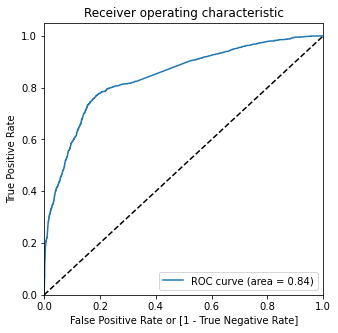

In [132]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.233086,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.169219,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.201327,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.689566,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.770454,7987,1,1,1,1,1,1,1,1,1,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.448118  0.993050  0.106786
0.2   0.2  0.640372  0.903925  0.475288
0.3   0.3  0.794363  0.774734  0.806658
0.4   0.4  0.800504  0.728128  0.845839
0.5   0.5  0.786175  0.639411  0.878105
0.6   0.6  0.774209  0.550695  0.914213
0.7   0.7  0.749961  0.437858  0.945455
0.8   0.8  0.728232  0.336059  0.973880
0.9   0.9  0.691230  0.210957  0.992061


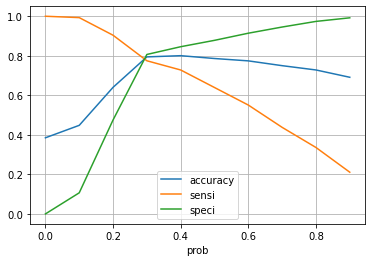

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()


The optimal probability cutoff is at 0.28

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.233086,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.169219,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.201327,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.689566,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.770454,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [137]:
#Lets check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7896394268619115

In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3095,  810],
       [ 526, 1920]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7849550286181521

In [141]:
# Let us calculate specificity
TN / float(TN+FP)

0.7925736235595391

In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7032967032967034


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8547362607014637


In [144]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7032967032967034

### Making predictions on the test set

In [145]:
X_test[['TotalVisits' ,'Total Time Spent on Website', 'Page Views Per Visit']] = Scaler.transform(X_test[['TotalVisits' ,'Total Time Spent on Website', 'Page Views Per Visit']])

In [146]:
X_test=X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,What is your current occupation_Working Professional,Specialization_Others
3271,0,-0.600595,0,0,0,0,1
1490,0,1.887326,1,0,0,1,0
7936,0,-0.752879,0,0,0,0,1
4216,0,-0.888650,0,1,0,0,0
3830,0,-0.587751,1,0,0,0,0


In [147]:
X_test_sm=sm.add_constant(X_test)

In [148]:
y_test_pred=res.predict(X_test_sm)

In [149]:
y_test_pred[:10]

3271    0.130534
1490    0.975999
7936    0.112626
4216    0.959992
3830    0.159436
1800    0.689472
6507    0.150172
4821    0.351083
4223    0.882568
4714    0.201327
dtype: float64

In [150]:
y_pred_1=pd.DataFrame(y_test_pred)

In [151]:
y_pred_1.head()

,0
3271,0.130534
1490,0.975999
7936,0.112626
4216,0.959992
3830,0.159436


In [152]:
#Converting y_test to a dataframe
y_test_df=pd.DataFrame(y_test)

In [153]:
#Putting CustID to index
y_test_df['CustID']=y_test_df.index

In [154]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [156]:
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.130534
1,1,1490,0.975999
2,0,7936,0.112626
3,1,4216,0.959992
4,0,3830,0.159436


In [157]:
#Renaming the columns
y_pred_final=y_pred_final.rename(columns={0:'Converted_Prob'})

In [158]:
#Rearranging the columns
y_pred_final=y_pred_final.reindex(['CustID','Converted','Converted_Prob'],axis=1)

In [159]:
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,3271,0,0.130534
1,1490,1,0.975999
2,7936,0,0.112626
3,4216,1,0.959992
4,3830,0,0.159436


In [160]:
y_pred_final['final_predicted']=y_pred_final.Converted_Prob.map(lambda x:1 if x>.28 else 0)

In [161]:
y_pred_final['Lead_Score']=y_pred_final.Converted_Prob*100

In [162]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.130534,0,13.053416
1,1490,1,0.975999,1,97.599878
2,7936,0,0.112626,0,11.262630
3,4216,1,0.959992,1,95.999150
4,3830,0,0.159436,0,15.943574


In [163]:
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.7947117150201983

In [164]:
confusion2=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
print(confusion2)

[[1389  345]
 [ 214  775]]


In [165]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [166]:
# Sensitivity
TP/(TP+FN)

0.7836198179979778

In [167]:
#Specificity
TN/(TN+FP)

0.801038062283737

- We have obtained a Sensitivity of 78% on the test set
- We have obtained a Specificity of 80% on the test set
- We have obtained an Accuracy of 79% on the test set

### Precision Recall View

In [168]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3429,  476],
       [ 882, 1564]], dtype=int64)

#### Precision

TP/TP+FP

In [169]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7666666666666667

##### Recall
TP / TP + FN

In [170]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.6394112837285364

In [171]:
from sklearn.metrics import precision_score,recall_score

In [172]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7666666666666667

In [173]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.6394112837285364

In [174]:
from sklearn.metrics import precision_recall_curve

In [175]:
y_train_pred_final.Converted,y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [176]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

In [177]:
y_pred_final.Converted_Prob

0       0.130534
1       0.975999
2       0.112626
3       0.959992
4       0.159436
          ...   
2718    0.421448
2719    0.309499
2720    0.669746
2721    0.278443
2722    0.224166
Name: Converted_Prob, Length: 2723, dtype: float64

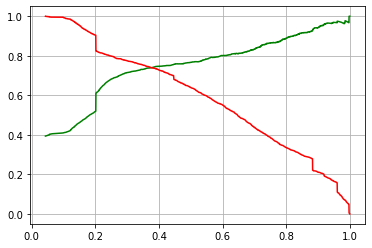

In [178]:
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.grid()

In [179]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.233086,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.169219,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.201327,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.689566,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.770454,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [180]:
#Precision Score of our model on training data

from sklearn.metrics import precision_score
precision_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7390243902439024

In [181]:
#Recall Score of our model on training data

from sklearn.metrics import recall_score
recall_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7432542927228127

### Making Predictions on the test set

In [182]:
X_test_sm=sm.add_constant(X_test)

In [183]:
y_test_pred=res.predict(X_test_sm)

In [184]:
y_test_pred[:10]

3271    0.130534
1490    0.975999
7936    0.112626
4216    0.959992
3830    0.159436
1800    0.689472
6507    0.150172
4821    0.351083
4223    0.882568
4714    0.201327
dtype: float64

In [185]:
y_pred_1=pd.DataFrame(y_test_pred)

In [186]:
y_pred_1.head()

,0
3271,0.130534
1490,0.975999
7936,0.112626
4216,0.959992
3830,0.159436


In [187]:
#Converting y_test to a dataframe
y_test_df=pd.DataFrame(y_test)

In [188]:
#Putting CustID to index
y_test_df['CustID']=y_test_df.index

In [189]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [191]:
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.130534
1,1,1490,0.975999
2,0,7936,0.112626
3,1,4216,0.959992
4,0,3830,0.159436


In [192]:
#Renaming the columns
y_pred_final=y_pred_final.rename(columns={0:'Converted_Prob'})

In [193]:
#Rearranging the columns
y_pred_final=y_pred_final.reindex(['CustID','Converted','Converted_Prob'],axis=1)

In [194]:
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,3271,0,0.130534
1,1490,1,0.975999
2,7936,0,0.112626
3,4216,1,0.959992
4,3830,0,0.159436


In [195]:
y_pred_final['final_predicted']=y_pred_final.Converted_Prob.map(lambda x:1 if x>.37 else 0)

In [196]:
y_pred_final['Lead_Score']=y_pred_final.Converted_Prob*100

In [197]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.130534,0,13.053416
1,1490,1,0.975999,1,97.599878
2,7936,0,0.112626,0,11.262630
3,4216,1,0.959992,1,95.999150
4,3830,0,0.159436,0,15.943574


In [198]:
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.8035255233198678

In [199]:
#Precision Score of our model
from sklearn.metrics import precision_score
precision_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.7238658777120316

In [200]:
#Recall Score of our model
from sklearn.metrics import recall_score
recall_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.7421638018200202

- We have obtained a Precision of 72% on the test set
- We have obtained a Recall of 74% on the test set